Author: Brian Erichsen Fagundes
Summer - 2024
UofU Masters in Software Development
Homework 5 - Classifiers

Part 1 - MNIST handwritten digits

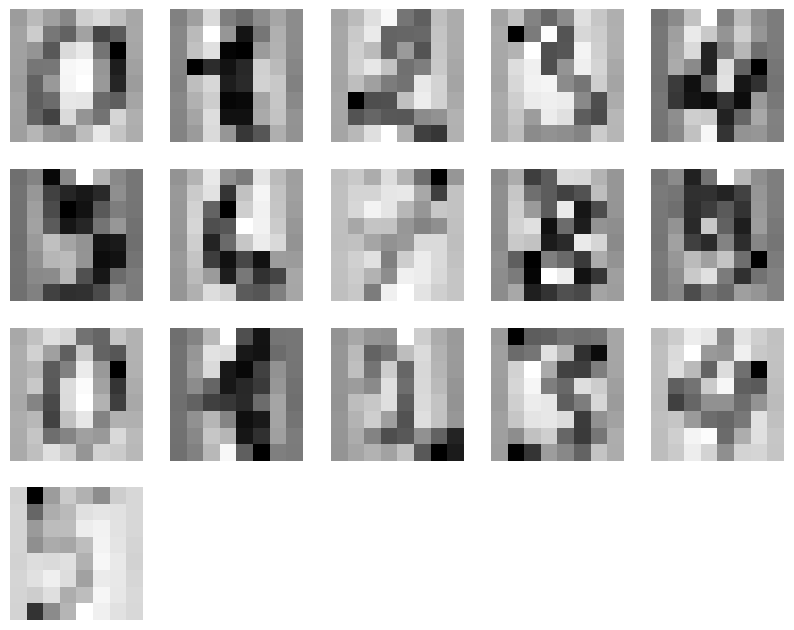

In [27]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np


# load the dataset
digits = load_digits()
# scale the data
x = scale(digits.data)
y = digits.target

# plot some images
plt.figure(figsize=(10, 10))
for i in np.arange(16):
    # nrows ncols, index to retrieve axis
    plt.subplot(5, 5, i + 1)
    ##displays data in 2D - x -data, cmap colormap, which interpolation method
    plt.imshow(np.reshape(x[i,:], (8,8)), cmap = 'Greys', interpolation='nearest')
    plt.axis('off')
# renders image of data
plt.show()

SVM Accuracy: 0.9755


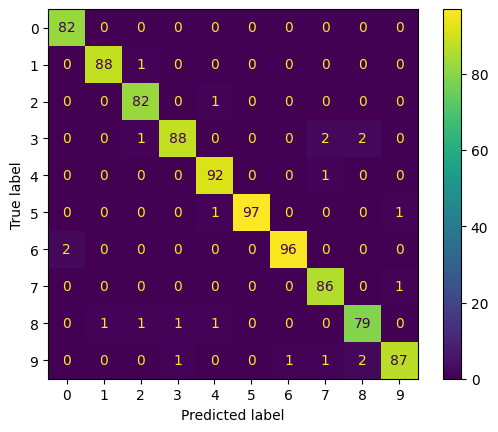

In [28]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# splits the data into training and testing sets --0.5 for half of data points
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# Uses Support Vector Machoines - optimal hyperplane
# Evaluates the accuracy of the model
# rbf kernel relies on Euclidean distance between data points
model_classifier = SVC(kernel='rbf', C=100)
model_classifier.fit(x_train, y_train)
y_pred_svm = model_classifier.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.4f}') # shows accuracy from model
# computes confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix_svm)
disp.plot()
plt.show()

Most common misclassified digits: 
Digit 1: 1 missclassifications
Digit 7: 1 missclassifications
Digit 3: 5 missclassifications
Digit 9: 5 missclassifications
Digit 6: 2 missclassifications
Digit 8: 4 missclassifications
Digit 5: 2 missclassifications
Digit 2: 1 missclassifications
Digit 4: 1 missclassifications


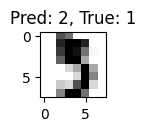

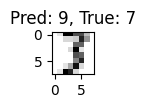

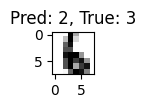

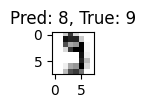

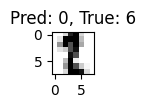

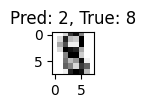

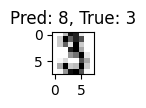

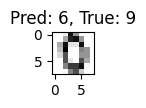

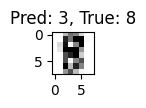

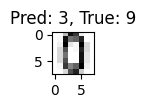

In [29]:
from collections import Counter
# Lets identify and plot most common misclassified digits
# numpy.where (condifition [x,y])
missclassified_indices = np.where(y_pred_svm != y_test)[0]
most_common_digit = missclassified_indices[:10] #first ten
misclassified_count = Counter(y_test[missclassified_indices])
print('Most common misclassified digits: ')
for digit, count in misclassified_count.items():
    print(f'Digit {digit}: {count} missclassifications')


plt.figure(figsize=(10, 4))
for index, mis_index in enumerate(most_common_digit):
    plt.subplot(1, 10, index + 1)
    plt.imshow(digits.images[mis_index], cmap='Greys', interpolation='nearest')
    plt.title(f'Pred: {y_pred_svm[mis_index]}, True: {y_test[mis_index]}')
    plt.show()


The most commom mistake that the classifier seems to be making on my data is missclassifying to a different digit when the true digit is 9 and 3; each one with 5 missclassifications from all missclassifications.

In [35]:
# Using cross validation let's find the best value for C
C_values = (1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 300, 500)
# cv int splits into train and test, default is 5
cross_val_scores = [cross_val_score(SVC(kernel='rbf', C=C), x, y, cv=5).mean() for C in C_values]
best_C = C_values[np.argmax(cross_val_scores)]
print(f'Best C Value from tested numbers is: {best_C}')

Best C Value from tested numbers is: 3


In [31]:
# Train data on raw data (non-scaled) and see accuracy score
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)
svm_raw = SVC(kernel='rbf', C= best_C)
svm_raw.fit(x_train_raw, y_train_raw)
y_pred_svm_raw = svm_raw.predict(x_test_raw)
accuracy_svm_raw = accuracy_score(y_test_raw, y_pred_svm_raw)
print(f'SVM Accuracy on raw data (non-scaled): {accuracy_svm_raw:.4f}')

SVM Accuracy on raw data (non-scaled): 0.9844


- Beguinning of Classification experiments using KNN algorithm instead of Support Vector Machines

KNN Accuracy: 0.9499


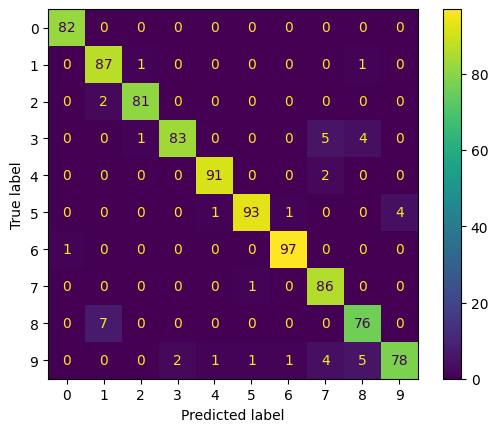

In [37]:
from sklearn.neighbors import KNeighborsClassifier
# KNN Classifier Experiments
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(x_train, y_train)

# Evaluates the accuracy of the model
y_pred_knn = knn_clf.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
display_cm_knn = ConfusionMatrixDisplay(conf_matrix_knn)
display_cm_knn.plot()
plt.show()

Most common misclassified digits for KNN: 
Digit 5: 6 missclassifications
Digit 7: 1 missclassifications
Digit 3: 10 missclassifications
Digit 9: 14 missclassifications
Digit 2: 2 missclassifications
Digit 8: 7 missclassifications
Digit 6: 1 missclassifications
Digit 1: 2 missclassifications
Digit 4: 2 missclassifications


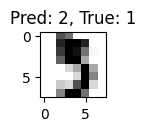

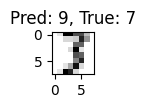

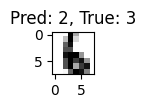

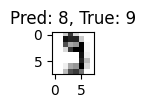

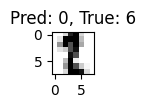

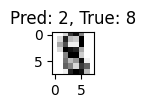

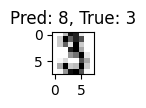

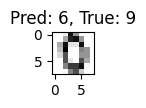

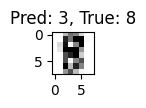

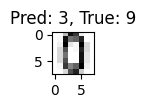

In [38]:
# Lets identify and plot most common misclassified digits
# numpy.where (condifition [x,y])
missclassified_indices_knn = np.where(y_pred_knn != y_test)[0]
most_common_digit_knn = missclassified_indices_knn[:10] #first ten
misclassified_count_knn = Counter(y_test[missclassified_indices_knn])
print('Most common misclassified digits for KNN: ')
for digit, count in misclassified_count_knn.items():
    print(f'Digit {digit}: {count} missclassifications')


plt.figure(figsize=(10, 4))
for index, mis_index in enumerate(most_common_digit):
    plt.subplot(1, 10, index + 1)
    plt.imshow(digits.images[mis_index], cmap='Greys', interpolation='nearest')
    plt.title(f'Pred: {y_pred_svm[mis_index]}, True: {y_test[mis_index]}')
    plt.show()

The digits 9 and 3 still the most digits being misclassfieds but using KNN supervised learning for classification. 

In [39]:
# Using cross validation let's find the best value for k
K_values = range(1, 51)
# cv int splits into train and test, default is 5
cross_val_scores_knn = [cross_val_score(KNeighborsClassifier(n_neighbors=k), x, y, cv=5).mean() for k in K_values]
best_K = C_values[np.argmax(cross_val_scores)]
print(f'Best K Value from tested numbers is: {best_K}')

Best K Value from tested numbers is: 3


In [40]:
# Train data on raw data (non-scaled) and see accuracy score
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)
knn_raw = KNeighborsClassifier(n_neighbors=best_K)
knn_raw.fit(x_train_raw, y_train_raw)
y_pred_knn_raw = knn_raw.predict(x_test_raw)
accuracy_knn_raw = accuracy_score(y_test_raw, y_pred_knn_raw)
print(f'KNN Accuracy on raw data (non-scaled): {accuracy_svm_raw:.4f}')

KNN Accuracy on raw data (non-scaled): 0.9844


<b> Part 2: Online News Dataset</b>